In [57]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [58]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [59]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [60]:
model= models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu' , input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

In [61]:
model.compile(optimizer='adam' , metrics = ['accuracy'], loss='categorical_crossentropy')

In [62]:
history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8869 - loss: 0.3629 - val_accuracy: 0.9833 - val_loss: 0.0476
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9784 - loss: 0.0694 - val_accuracy: 0.9889 - val_loss: 0.0318
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9850 - loss: 0.0492 - val_accuracy: 0.9892 - val_loss: 0.0289
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9861 - loss: 0.0422 - val_accuracy: 0.9899 - val_loss: 0.0287
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9886 - loss: 0.0360 - val_accuracy: 0.9914 - val_loss: 0.0245


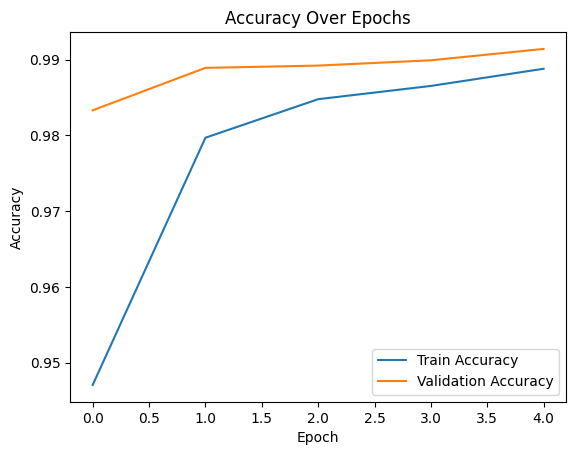

In [63]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

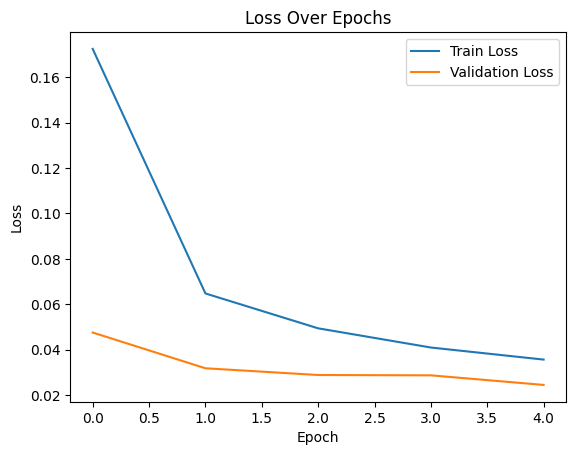

In [64]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
